<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/show_image_online_root.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code load ROOT, python 2 environment. Runs this part only the first time.

In [1]:
!mkdir -p APPS
!pwd
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

import sys
sys.path.append("/content/APPS/root/lib")
import ctypes
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')
!pip install root-numpy
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGpad.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTreePlayer.so')

/content
--2019-11-26 14:00:51--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz’

root_v6.13.08.Linux 100%[===================>] 131.05M  93.8MB/s    in 1.4s    

2019-11-26 14:00:58 (93.8 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz’ saved [137415272/137415272]

     |████████████████████████████████| 522kB 9.6MB/s 
  Created wheel for root-numpy: filename=root_numpy-4.8.0-cp27-cp27mu-linux_x86_64.whl size=1620972 sha256=7a0324fd0ba0983c2a9a1ba9deb2d8b4888514042775a0bc6c76f86285bee273
  Stored in directory: /root/.cache/pip/wheels/f0/3c/18/62ccf3aec0284175916617d699f179d7cdbe4de0c7070be2a5
Successfully built root-numpy


<CDLL '/content/APPS/root/lib/libTreePlayer.so', handle 558795f28d00 at 7fc4f4307250>

Load the funcion to retrive data from swift CYGNO server

In [2]:
import matplotlib.pyplot as plt
import numpy as np    
import ROOT
from root_numpy import hist2array
%matplotlib inline


def swift_root_file(sel, run):
    BASE_URL  = "https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/"
    file_root = ('Data/'+sel+'/histograms_Run%05d.root' % run)
    return BASE_URL+file_root

def reporthook(blocknum, blocksize, totalsize):
    import sys
    readsofar = blocknum * blocksize
    if totalsize > 0:
        percent = readsofar * 1e2 / totalsize
        s = "\r%5.1f%% %*d / %d" % (
            percent, len(str(totalsize)), readsofar, totalsize)
        sys.stderr.write(s)
        if readsofar >= totalsize: # near the end
            sys.stderr.write("\n")
    else: # total size is unknown
        sys.stderr.write("read %d\n" % (readsofar,))

def swift_read_root_file(url):
    import ROOT
    import os
    from urllib import urlretrieve
    tmpname = "./tmp." + str(os.getpid()) + ".root"
    urlretrieve(url, tmpname, reporthook)
    f  = ROOT.TFile.Open(tmpname);
    os.remove(tmpname)
    return f   

def root_TH2_name(root_file):
    pic = []
    wfm = []
    for i,e in enumerate(root_file.GetListOfKeys()):
        che = e.GetName()
        if ('pic_run' in str(che)):
            pic.append(che)
        elif ('wfm_run' in str(che)):
            wfm.append(che)
    return pic, wfm

Welcome to JupyROOT 6.13/08


download file [rum] from [tag] 

In [3]:
run = 2332
tag = "LAB" # Run tag: MAN, FNG, LAB, BTF, LTD
print ('Download and open file: '+swift_root_file(tag, run))
f = swift_read_root_file(swift_root_file(tag, run))
print ('Find Keys: '+str(len(f.GetListOfKeys())))
pic, wfm = root_TH2_name(f)
max_image = len(pic)
max_wfm = len(wfm)
print ("# of Images (TH2) Files: %d " % (max_image))
print ("# of Waveform (TH2) Files: %d " % (max_wfm))

Download and open file: https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run02332.root


 99.7% 902356992 / 905279337

Find Keys: 480
# of Images (TH2) Files: 240 
# of Waveform (TH2) Files: 240 


100.0% 905281536 / 905279337


show imege file from [ini] to [end]

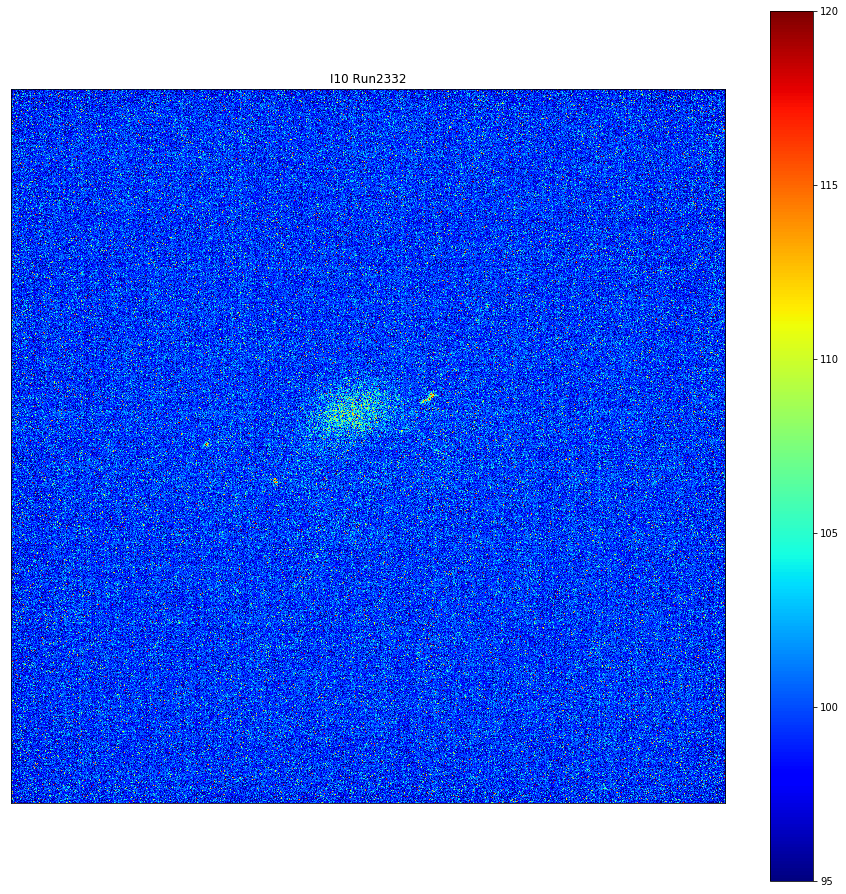

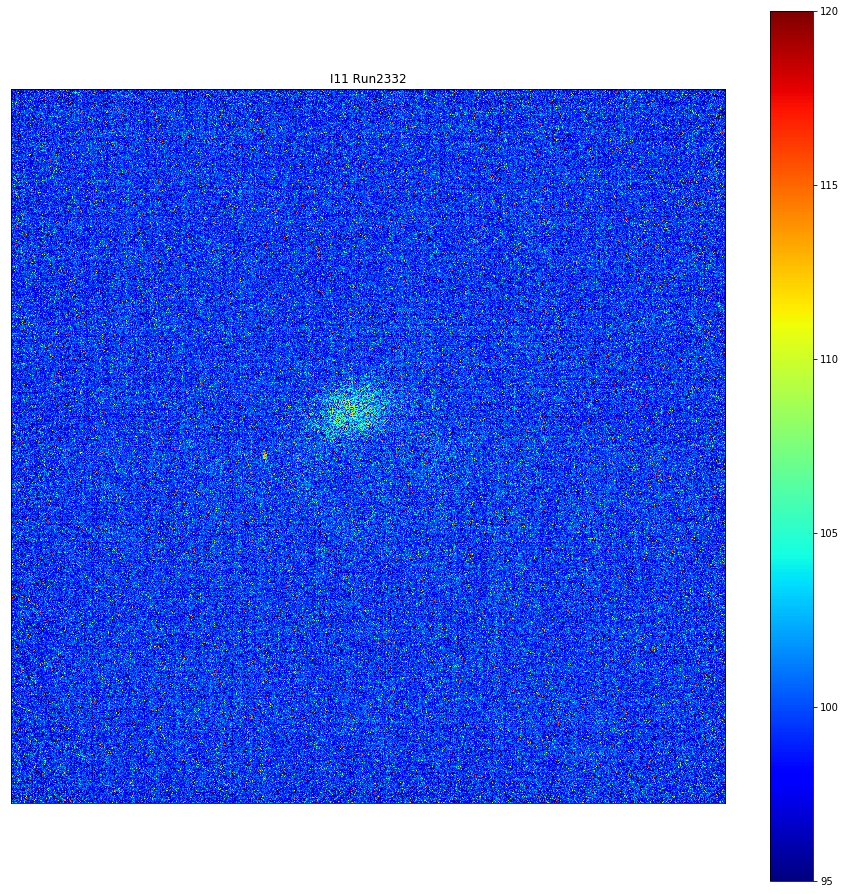

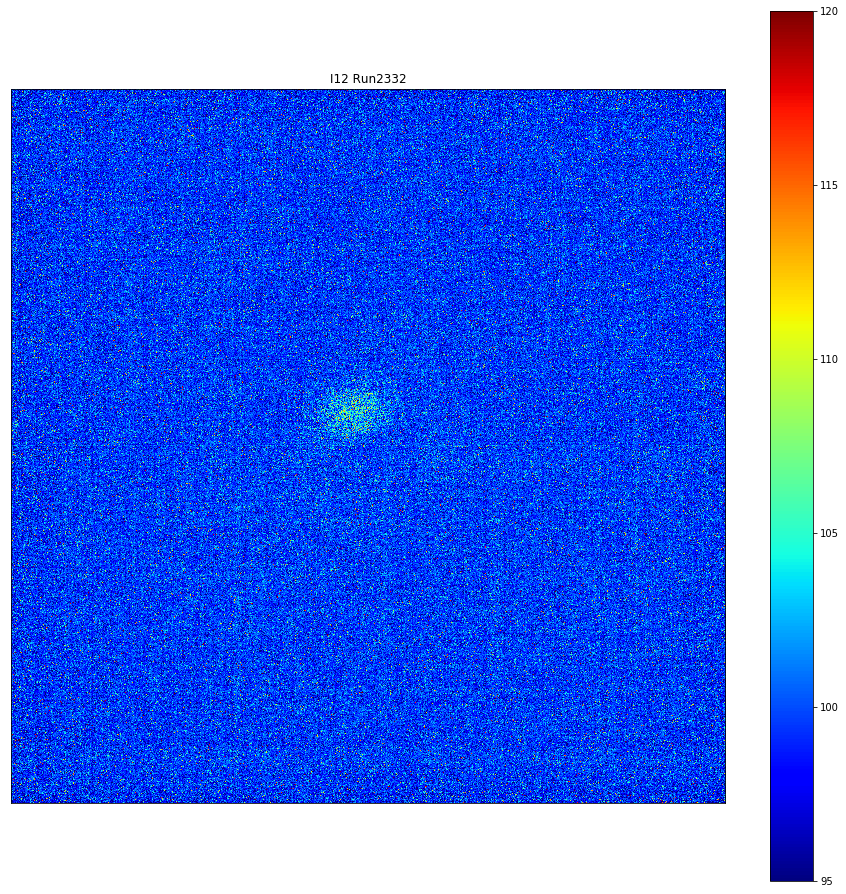

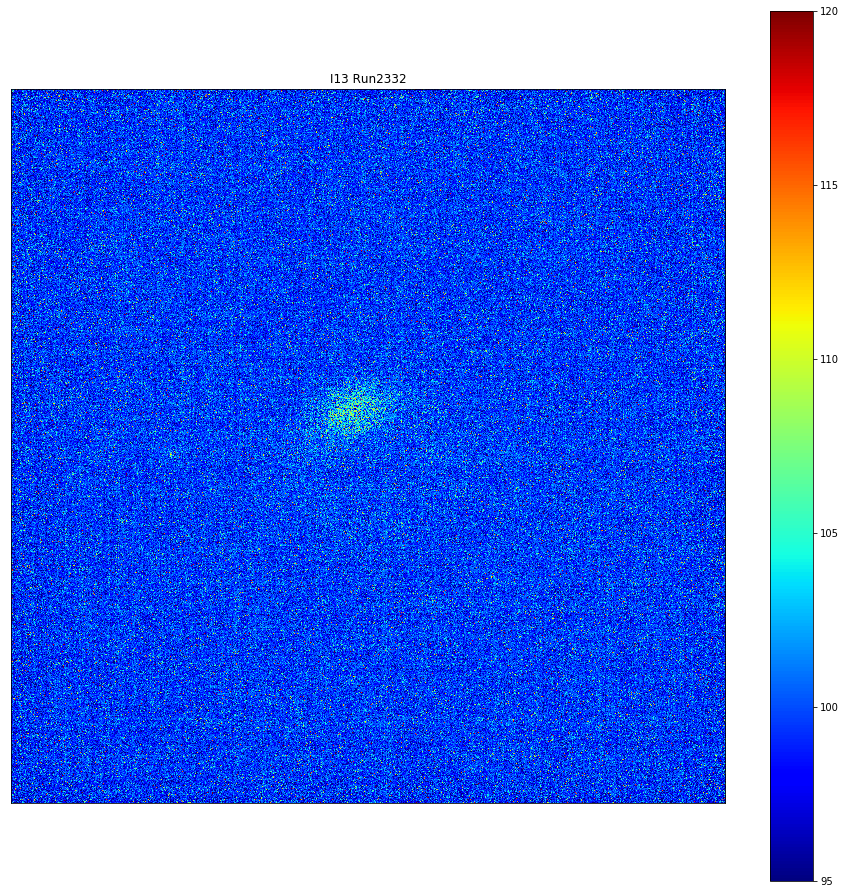

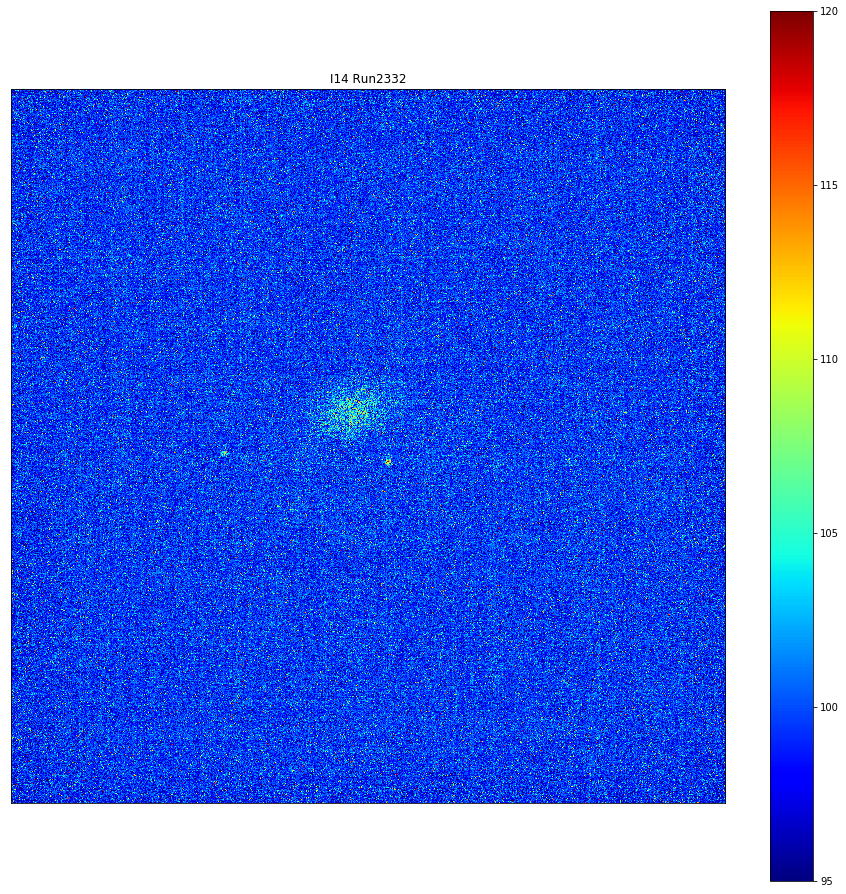

In [4]:
ini = 10
end = ini+5
save = 0
for iTr in range(ini,end):
    image = hist2array(f.Get(pic[iTr])).T
    fig = plt.figure(figsize=(16,16))
    plt.title("I%d Run%d" % (iTr, int(run)))
    plt.imshow(image,  cmap="jet", vmin=95,vmax=120)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    if save == 1:
        plt.savefig('./images/I%dRun%s.png' % (iTr, run), format='png',  dpi = 400, bbox_inches = 'tight', pad_inches = 0)
    plt.show()